<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


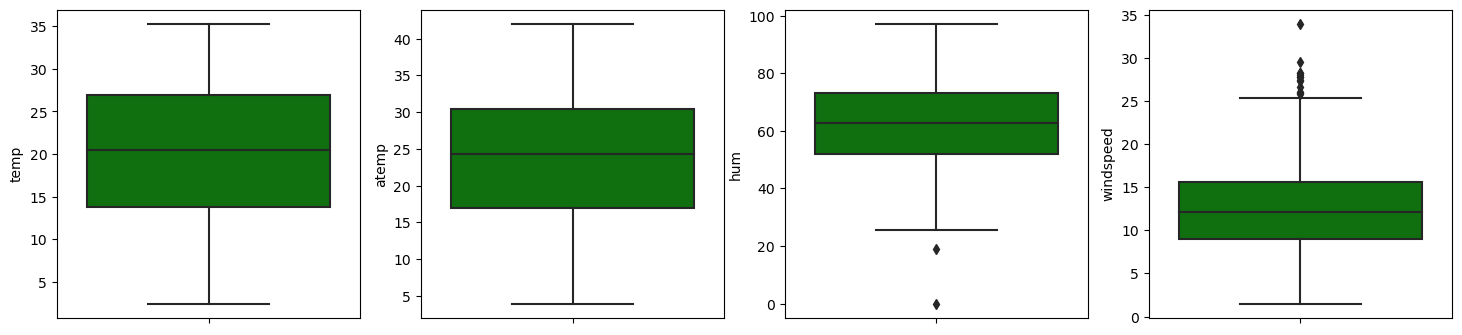

<Figure size 1500x3000 with 0 Axes>

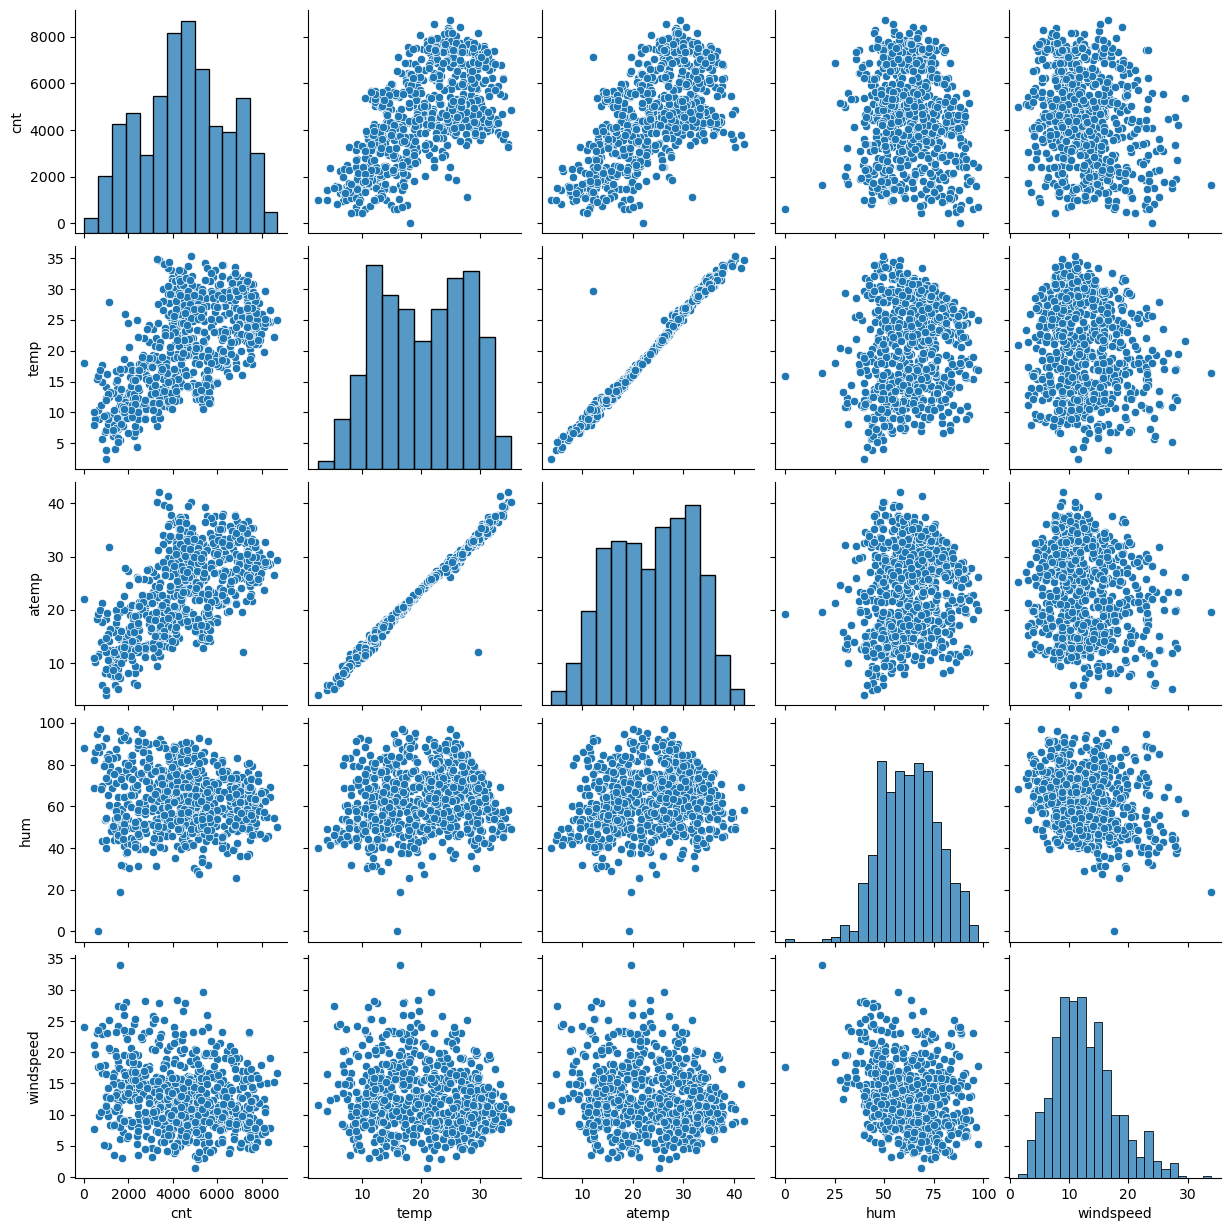

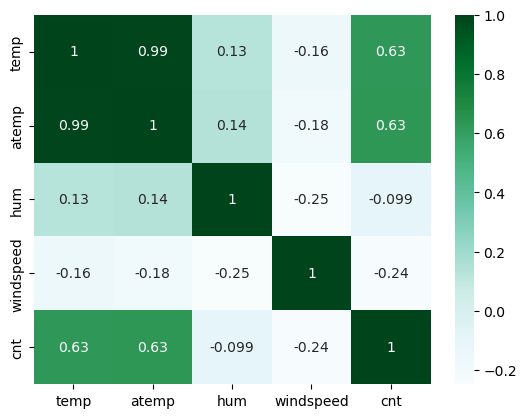

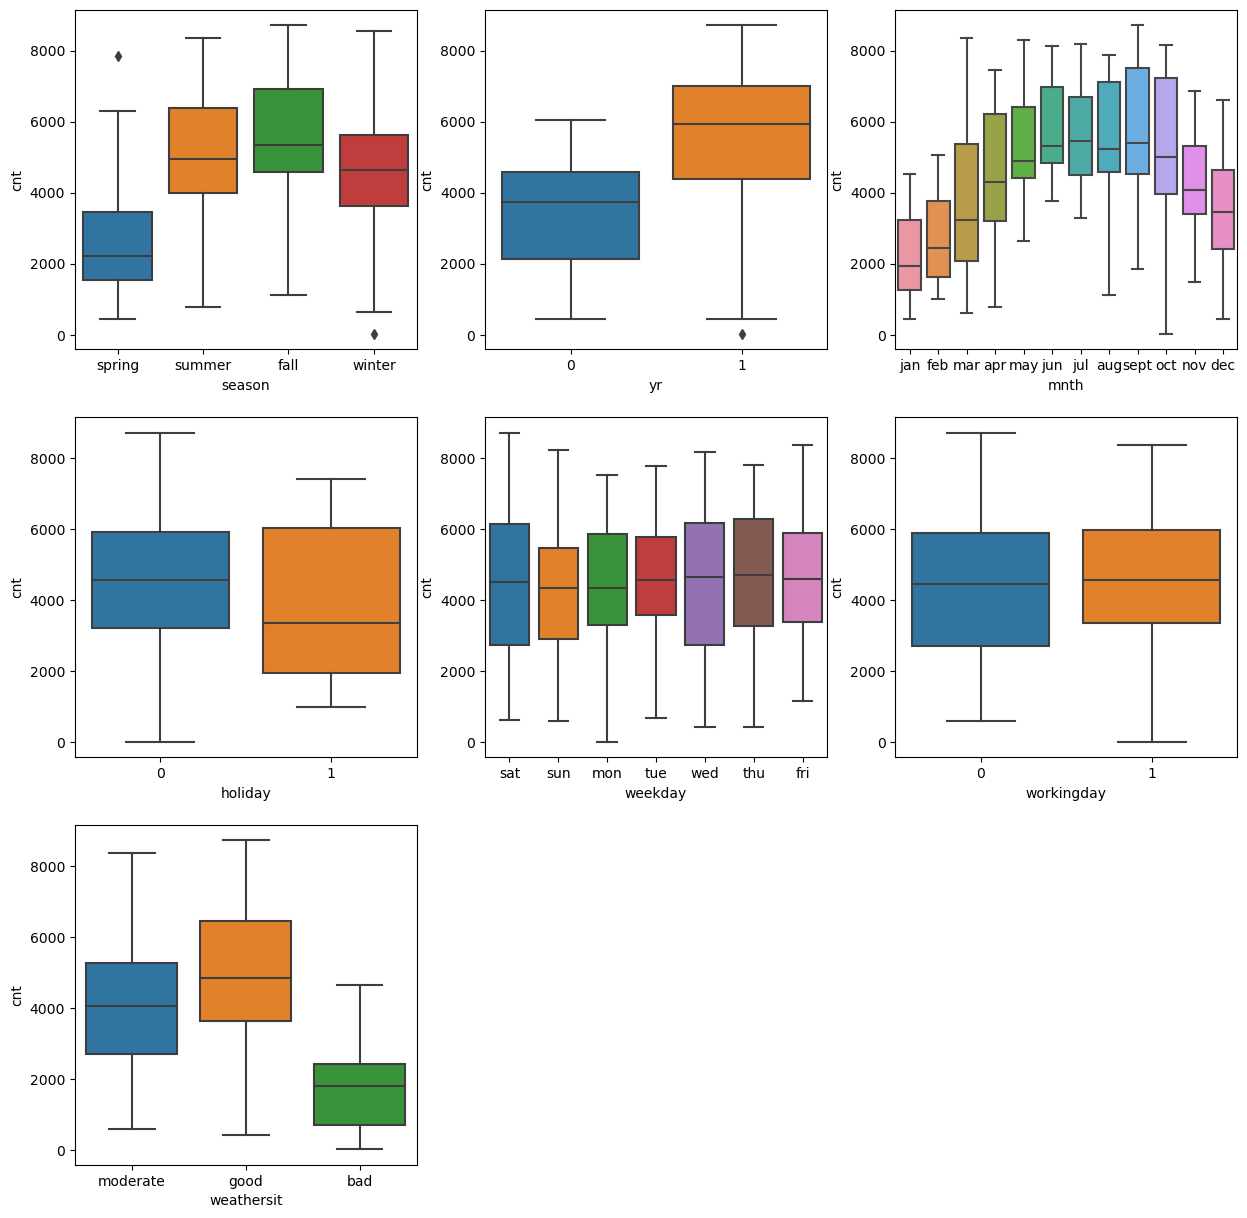

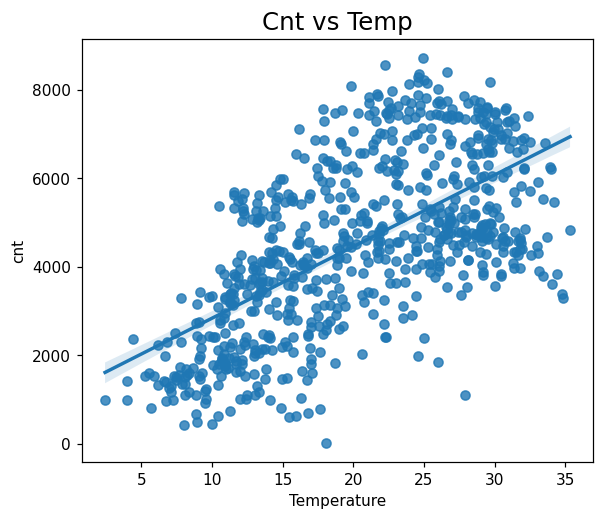

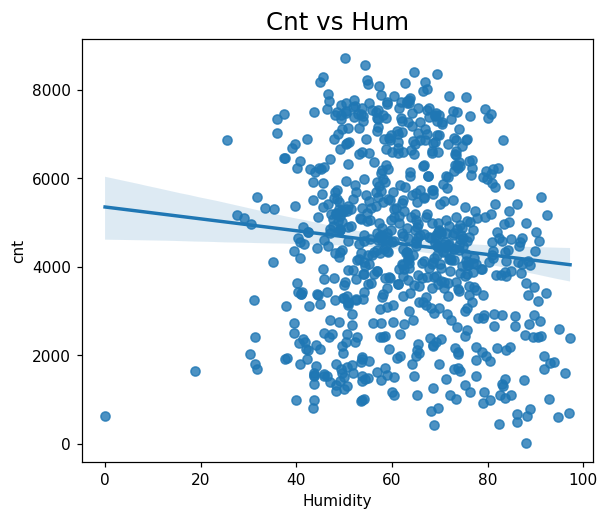

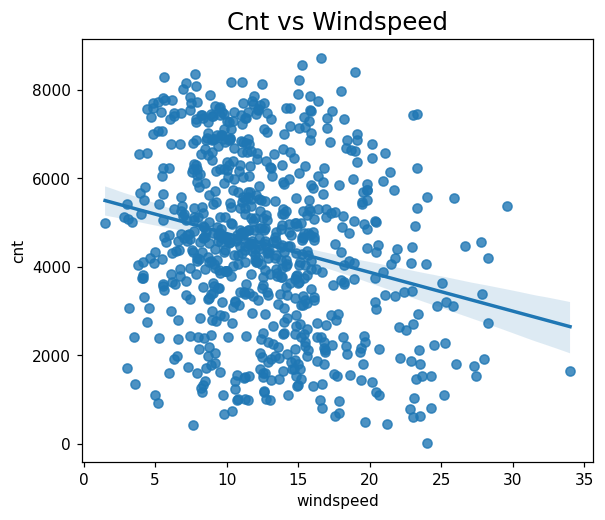

(511, 30)
(219, 30)
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.5
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          5.72e-185
Time:                        11:30:55   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2693.

              Features   VIF
8                 temp  3.00
0                   yr  2.07
7  weathersit_moderate  1.53
2             mnth_jul  1.40
3        season_winter  1.36
1        season_spring  1.28
4            mnth_sept  1.20
5          weekday_sun  1.18
6       weathersit_bad  1.05
1849.311114143623 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


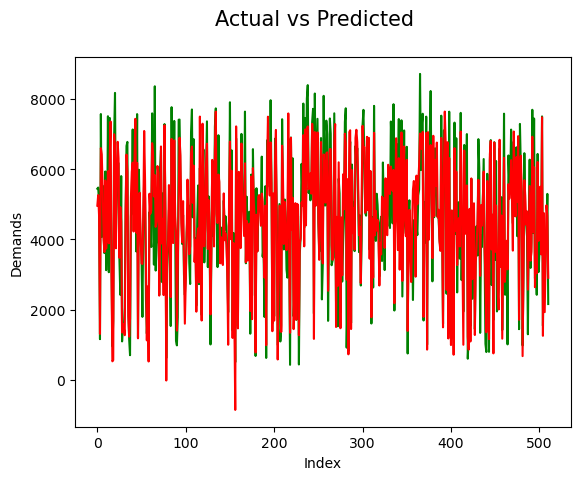

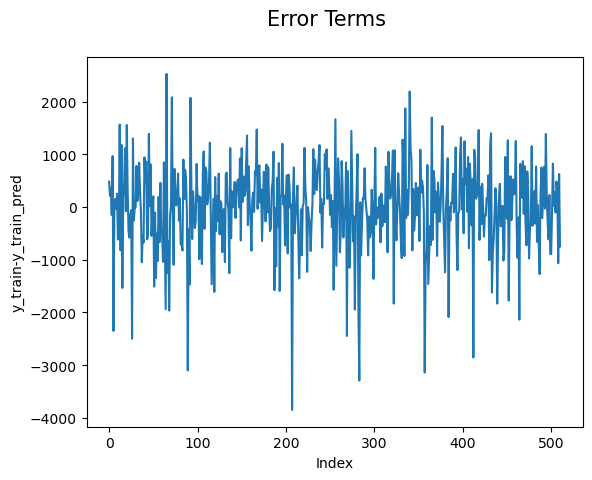

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.33e-179
Time:                        11:30:57   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

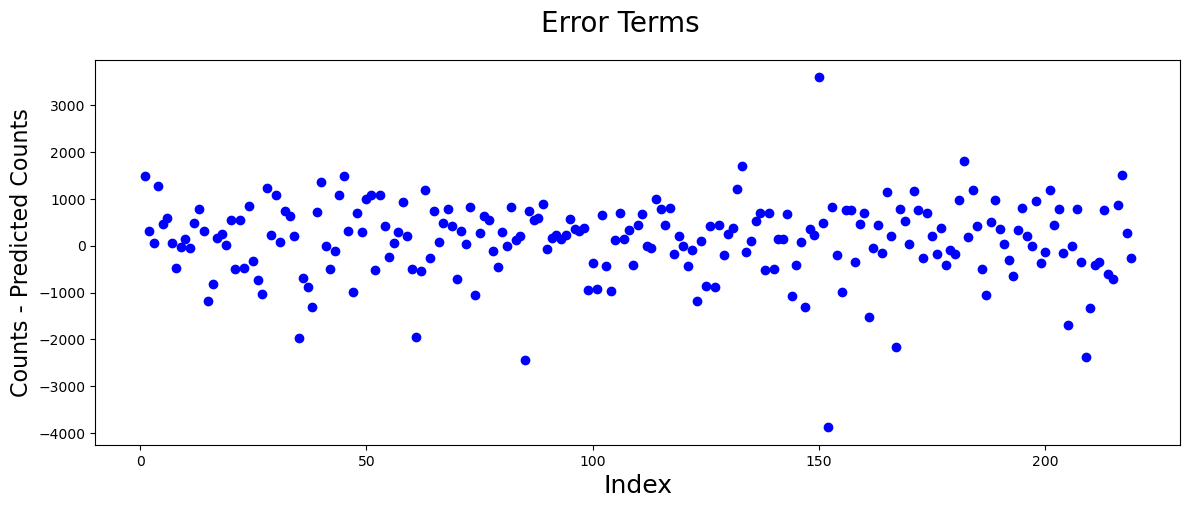

In [33]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

#Reading the csv file
bikeSharing_df = pd.read_csv('day.csv')

#Checking the few fields of the file
bikeSharing_df.head()
#Checking the number of rows and columns
bikeSharing_df.shape
#Checking the data type and number of null values
bikeSharing_df.info()
#checking the columns of data file
bikeSharing_df.columns
#checking the datatypes of data file
bikeSharing_df.dtypes
### There are 730 rows and 16 columns and there are no null values
# Data cleaning
#instant column indicates the unique serial number just to know the number of entries or to differentiate it, so removing this column
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

#dteday coulumn indicates the date,but years and the months values are already derived from this variable in diffreent other columns. Hence this column can be removed
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)
# Deleting column casual and registered values column as these are nothing but the SUM of final predicted cnt value which we need to predict using model
bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)
#Checking the data frame after dropping
bikeSharing_df.head()
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, color='green', data=bikeSharing_df)
    i+=1
    #Could not see any outliners from the plot,so no need to handle the outliners
#Converting the categorical variables from numerical values to string for better understanding
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()
#Checking the linear relationship between the numerical variables using pair plot
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()
#From the plot what i could see is temp and atemp are highly correlated with the target variable cnt
#And also temp and atemp variables are also correlated.
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()
# From the heatmap plot the observation is that temp and atemp are highly correlated which 0.99 and by the value the atemp seems to be derived from temp.So we can delete the duplicate variable atemp
#Analysis on catergorical variables with target variable
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()
#Outcomes of the plot

#cnt is better in the fall season compared to ther
#cnt value is increased with year (ie) it is in increasing trend after a year
#cnt value is in increasing trend from jan to june and at september it is in the highest peak
#cnt value at the start and end of the years are less
#cnt value is at higher trand during the good weather sit condition
#cnt value is at the decreasing trend during holidays

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()
# The rental bike demands are high with increase in temperature
#cnt and temperature are highly correlated
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()
#The plot shows a scattered image
# although we can say the demand for bike decreases when the humiditidy increases

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()
#The plot shows a scattered image
# although we can say the demand for bike decreases when the windspeed increases

#Data Preparation for linear regression

#Creating dummy variables for categorical variables season,mnth,weekday by deleting first category
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])

bikeSharing_df.columns
bikeSharing_df.head()


#Model Building

#Step1: Spliting data into train and test
#y to contain only target variable
y=bikeSharing_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.head()
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

#Scaling

# scaling continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Using Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.describe()
X_train.head()
#Building a model using recurssive feature elimination and automated approach

lr = LinearRegression()
lr.fit(X_train,y_train)

#Reducing the column to 15 using automate dapproach

rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#Function to calculate VIFs
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#Print Columns selected by RFE
X_train.columns[rfe.support_]

# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']]
X_train_rfe.shape

#Model1 with all selected RFE variables
cols = ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

#Model2
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

#Model3: Dropping holiday as it has negative coefficient and high p value
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

#Model4: Dropping mnt_jul as it has negative coefficient and high p value

cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)
# Model5: using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)
#Model6:adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
build_model(cols)
get_vif(cols)

#Observation

# The R-squared and adjusted R squared values are stable and matching, the difference is very less so no need for removing any more parameter
# The VIF values of all selected variables are within the limit
# The p values of all the variables is almost 0.0

#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1
#Final model using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

#Model Evaluation

y_train_pred = lr.predict(X_train[cols])
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors') 
    plot_res_dist(y_train, y_train_pred)
    

#from the plot we could see errors are normally distributed

#Comparision of actual and predicted train data
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Plot shows actual and prdicted data are almost matching

# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()
#Error terms are independent to each other is what we could see from plot

#Print R-squared Value
r2_score(y_train,y_train_pred)
#R2 is same as we observerd for final model

# Predict values for test data

#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed',]

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

#R squared for test predictions
r2_score(y_test,y_test_pred)

#Plotting test and predicted test data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label
    plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')
    
# From the plot we see test data predictions are almost same as actual
#Plot error terms for test data
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label
plot_err_terms(y_test,y_test_pred)

# the error terms are independent and randomly distributed, which shows the model is well explained by the selected variables

#Model Interpretation

#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
lm = build_model(cols)

#Suggestions to company from the final model results.
# The rentals are huge during Spring, so they can allocate resources high at this time and increase the business
# During the month of September the rentals request are high, so the company can plan accordingly
# The users count is getting increased every year, so the expectation is the users count will go high the in the next year comparing 2019
#During snow and rainy times the request will be less, so resource can be planned for some other activities
# And the request count is high during the pleasant weathers
#Along with this the number of rentals are more during working days when compared to holidays.
# The important variables for this bile sharing data for doing the predictions are year,season,month,temp,weathersit,days,hum,windspeed
